In [3]:
from gplearn.genetic import SymbolicRegressor

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
N=100
sigma_squared = 0.2

def funcao(x):
    return 0.6*x**3 - x**2 + 2 -x+ 0.3*np.cos(12*x)

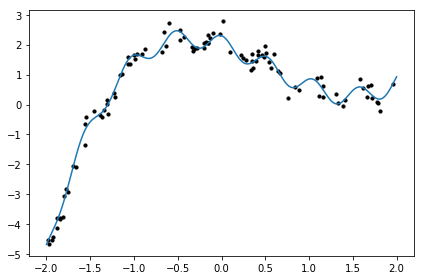

In [29]:
X=[]
y=[]

for i in range(N):
    aux=np.random.uniform(-2,2)
    X.append([aux])
    y.append([funcao(aux) + np.random.normal(0,sigma_squared)])
    
    
plt.scatter(X,y, s=10, color = 'black')
plt.plot(np.linspace(-2,2,500),funcao(np.linspace(-2,2,500)))

plt.tight_layout()

plt.savefig('exemp')

In [30]:
est_gp = SymbolicRegressor()

est_gp.fit(X,y)

/home/carlo/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SymbolicRegressor(const_range=(-1.0, 1.0), feature_names=None,
         function_set=('add', 'sub', 'mul', 'div'), generations=20,
         init_depth=(2, 6), init_method='half and half', low_memory=False,
         max_samples=1.0, metric='mean absolute error', n_jobs=1,
         p_crossover=0.9, p_hoist_mutation=0.01, p_point_mutation=0.01,
         p_point_replace=0.05, p_subtree_mutation=0.01,
         parsimony_coefficient=0.001, population_size=1000,
         random_state=None, stopping_criteria=0.0, tournament_size=20,
         verbose=0, warm_start=False)

In [31]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y,est_gp.predict(X))

0.24607906154381184

In [32]:
print(est_gp._program)

sub(sub(sub(add(div(X0, X0), div(X0, X0)), mul(X0, X0)), mul(add(div(X0, X0), div(X0, X0)), mul(sub(sub(add(div(X0, X0), div(X0, X0)), mul(X0, X0)), mul(div(add(X0, X0), sub(X0, X0)), mul(div(-0.374, 0.786), sub(div(X0, X0), mul(X0, X0))))), mul(X0, 0.213)))), mul(div(mul(X0, 0.213), 0.786), mul(X0, 0.213)))
